# Measures of central tendency

## Overview

In the previous section we went over various visualization methodologies such as histgram and box plots. 
However, useful these plot may be, we still need to be able to describe the data numerically. In this section therefore, we 
dsicuss mesaures of central tendency. Namely the median and the mean values respectively.

## Mean value

Perhaps the most frequently use measure of data centrality is the (arithmetic) mean or expected
value. Recall that this is calulated differently depending on if the data we are handling are
continuous or discrete variables.

----

**Expected value (discrete variable)**


$$E\left[X\right] = \sum xP_X(x)$$


**Expected value (continuous variable)**

$$E\left[X\right] = \int_x xP_X(x)dx$$

----

Below are some properties of the mean function:

----

**Properties of expectations**


- $E\left[X + Y \right] = E\left[X \right] + E\left[Y \right]$
- $E\left[aX \right] = aE\left[X\right]$
- $E\left[c\right] = c$

For independent variables $X,Y$ we have

- $E\left[XY \right] = E\left[X\right]  E\left[Y \right]$

----

Let's see an example using Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create some data to play around with.

In [2]:
data = np.array(list(range(1, 11)))

# numpy allows us to easily calculate the mean
print(f"Mean of the data={np.mean(data)}")

Mean of the data=5.5


Let's plot the data and find the midpoint

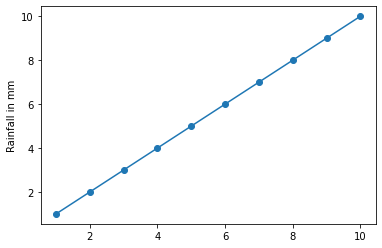

In [3]:
data.sort()
number_of_measurements = data.size
plt.plot(range(1, number_of_measurements + 1), data)
plt.scatter(range(1, number_of_measurements + 1), data)
plt.ylabel('Rainfall in mm')
plt.show()

Computing the midpoint of the data can be done in various ways as shown below.
The range i.e. the difference between the maximum and minimum value in the data
is variability measure that we will discuss in the next section.

In [5]:
rainfall_range = data.max() - data.min()

# calculate the midpoint one way
midpoint_1 = data.min() + rainfall_range * 0.5

# calculate the midpoint another way
midpoint_2 = (data.max() + data.min()) * 0.5

# these should be the same
assert midpoint_1 == midpoint_2 

print(f"The midpoint is {midpoint_1}")


The midpoint is 5.5


Add the midpoint to our plot.

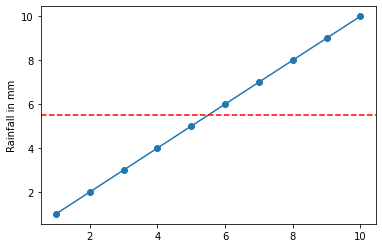

In [7]:
data.sort()
number_of_measurements = data.size
plt.plot(range(1, number_of_measurements + 1), data)
plt.scatter(range(1, number_of_measurements + 1), data)
plt.axhline(midpoint_1, color='r', linestyle='--')
plt.ylabel('Rainfall in mm')
plt.show()

The way we generated the data, made the whole drill rather easy. The midpoint, as expected,
splits the values in half; half of the observed values are below the mean and half of them above it.
However, this may not always be the case. This is a typical scenario when the distribution is really asymmetric. 
In these cases computing the median value makes more sense.

# Median value

The median, $M$ is the value in the middle of a dataset. That is 50% of the data point will be below it and 50$ above it. 
Let's consider the following values. Notice that these are already sorted.

In [38]:
median_data = np.array([23.9, 24.1, 24.85, 25.0, 25.2, 25.6, 25.7, 25.9, 26.1, 26.3, 26.5, 26.8, 27.4, 27.5, 27.8, 28.5, 28.7, 29.3, 30.2])
print(f"Number of measurements={median_data.size}")

Number of measurements=19


Histogram plots tells us about the shape of the empircal distribution. 

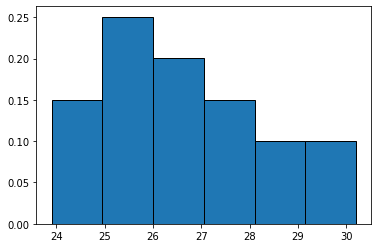

In [35]:
plt.hist(median_data, bins='auto', edgecolor='black', density=True)
plt.show()

In [36]:
mean = np.mean(median_data)
median = np.median(median_data)
print(f"Mean of median data={mean}")
print(f"Median of median data={median}")
midpoint = (median_data.max() + median_data.min()) * 0.5

Mean of median data=26.59736842105263
Median of median data=26.3


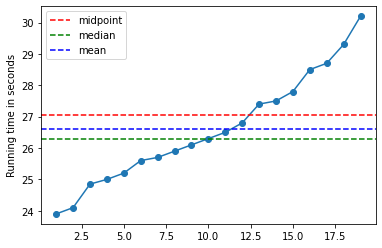

In [37]:
measurements = median_data.size
plt.plot(range(1, measurements + 1), median_data)
plt.scatter(range(1, measurements + 1), median_data)
plt.axhline(midpoint, color='r', linestyle='--', label="midpoint")
plt.axhline(median, color='g', linestyle='--', label="median")
plt.axhline(mean, color='b', linestyle='--', label="mean")
plt.ylabel('Running time in seconds')
plt.legend()
plt.show()

The mean value and the median are almost the same but the midpoint does not properly 
split the values. In order to compute the median of a numeric dataset, we need first to sort
the data. This is probably one of the disadvantages when computing this statistic. When the size of the data
is an odd number, just like the scenario herein, the median is calulated according to

$$M = \frac{N + 1}{2}$$

where $N$ is the size of the dataset. Notice that $M$ is the index of the median value within the dataset and not the median itself.
The mean is hugely affected by extreme values either 
very large or very small value. Let's see this by extending our example. Notice that now the data size is an even number

In [39]:
median_data = np.array([23.9, 24.1, 24.85, 25.0, 25.2, 25.6, 25.7, 25.9, 26.1, 26.3, 26.5, 26.8, 27.4, 27.5, 27.8, 28.5, 28.7, 29.3, 30.2, 70.0])
print(f"Number of measurements={median_data.size}")

Number of measurements=20


In [40]:
mean = np.mean(median_data)
median = np.median(median_data)
print(f"Mean of median data={mean}")
print(f"Median of median data={median}")
midpoint = (median_data.max() + median_data.min()) * 0.5

Mean of median data=28.767499999999995
Median of median data=26.4


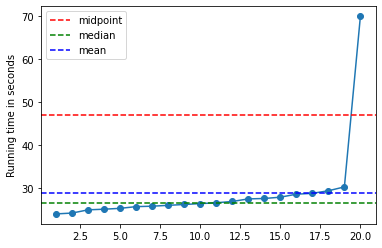

In [41]:
measurements = median_data.size
plt.plot(range(1, measurements + 1), median_data)
plt.scatter(range(1, measurements + 1), median_data)
plt.axhline(midpoint, color='r', linestyle='--', label="midpoint")
plt.axhline(median, color='g', linestyle='--', label="median")
plt.axhline(mean, color='b', linestyle='--', label="mean")
plt.ylabel('Running time in seconds')
plt.legend()
plt.show()

Observe, how the outlier 70 affected the mean and the midpoint.
The median however remained more or less unaffected. This is because the median ranks the data. When the data size is even,
the median can be calculated as the average of the data point of rank $N/2$ and the data point of rank $(N/2) + 1$.

## Weighted mean

Sometimes when computing the mean we want to weight the importance of an observed value. 
In this case
we can compute the weighted arithmetic mean

$$\mu = \frac{\sum_i w_ix_i}{N}$$

where $w_i$ is the weight associated with the observation $x_i$.

Python makes it easy for us to compute the weighted mean via the ```average``` function.

In [2]:
data = [50, 25, 36, 89, 36, 12, 8, 36, 9, 8, 8]
weights = [1,1,3,1,3,1,3,1,1,3,3]

weighted_mean = np.average(data, weights=weights)
print(f"Arithmetic mean={np.mean(data)}")
print(f"Weighted mean={weighted_mean}")

Arithmetic mean=28.818181818181817
Weighted mean=24.238095238095237


## Geometric mean

## Mode

Another statistic of centrality is the mode. This is simply the most frequently occurying value in the dataset. For example, given the data $[50, 25, 36, 89, 36, 12, 8, 36]$ then the mode is 36. When there is only one mode the dataset is single mode. However, this need not be the case. The following dataset is multi-mode $[50, 25, 36, 89, 36, 12, 8, 36, 9, 8, 8]$.The two modes as 36 and 8.

## Summary

In this section we reviewed the mean and the median as a means of estimating the centrality of the data.
Computing the mean is not difficult and this is one of the reasons that makes this statistic appealing to report.
However, if the data is severely asymmetric it may not appropriate to use. In this latter case computing the median $M$ is 
a better option.

## References

1. <a href="https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php">Measures of Central Tendency</a>